In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Input , Dropout , BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from utils import *
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[]


2025-04-21 00:25:23.714881: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-21 00:25:23.736550: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
IMG_SIZE = (200,200)
train_generator = generator_transformations("train",IMG_SIZE)
test_generator = generator("test",IMG_SIZE)
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2021 images belonging to 6 classes.
Found 506 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [15]:
def model_cnn(size:tuple[int,int]) -> Sequential:
    model = Sequential()
    model.add(Input((size[0], size[1], 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(96, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(96, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model

model1 = model_cnn(IMG_SIZE)
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 200, 200, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 198, 198, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 97, 97, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 48, 48, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 96)     │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,954 (1.53 MB)

 Trainable params: 399,948 (1.53 MB)

 Non-trainable params: 6 (24.00 B)

In [16]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(train_generator, epochs=200, validation_data=test_generator, verbose=1, callbacks=[early_stopping])

/mnt/c/Users/kkiko/Desktop/CAA/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1745192711.051727   13425 service.cc:152] XLA service 0x7fcfa0002c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745192711.051775   13425 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-04-21 00:45:11.304345: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745192711.771146   13425 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-21 00:45:23.538246: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng14{} for conv %cudnn-conv-bias-activation.16 = (f32[32,96,97,97]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,99,99]{3,2,1,0} %bitcast.4536, f32[96,64,3,3]{3,2,1,0} %bitcast.4527, f32[96]{0} %bitcast.4586), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={o

 1/64 ━━━━━━━━━━━━━━━━━━━━ 9:50 9s/step - accuracy: 0.2500 - loss: 1.7898

I0000 00:00:1745192719.554210   13425 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/64 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.2595 - loss: 1.7192

2025-04-21 00:45:43.564475: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng12{k11=0} for conv %cudnn-conv-bias-activation.16 = (f32[5,96,97,97]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,64,99,99]{3,2,1,0} %bitcast.4535, f32[96,64,3,3]{3,2,1,0} %bitcast.4526, f32[96]{0} %bitcast.4585), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_2_1/conv2d_11_1/convolution" source_file="/mnt/c/Users/kkiko/Desktop/CAA/CAA_P1/.venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-04-21 00:45:35.382051: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took -358.252721

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.2610 - loss: 1.7130

2025-04-21 00:45:48.575133: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng0{} for conv %cudnn-conv-bias-activation.18 = (f32[32,96,21,21]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,23,23]{3,2,1,0} %bitcast.694, f32[96,128,3,3]{3,2,1,0} %bitcast.701, f32[96]{0} %bitcast.703), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_2_1/conv2d_13_1/convolution" source_file="/mnt/c/Users/kkiko/Desktop/CAA/CAA_P1/.venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-04-21 00:45:48.586945: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 7.756035828s
Try

64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 398ms/step - accuracy: 0.2612 - loss: 1.7124 - val_accuracy: 0.2589 - val_loss: 1.7150
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.3233 - loss: 1.6028 - val_accuracy: 0.4150 - val_loss: 1.5245
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.4132 - loss: 1.4604 - val_accuracy: 0.4526 - val_loss: 1.5289
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.4825 - loss: 1.3794 - val_accuracy: 0.4012 - val_loss: 1.4730
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.4750 - loss: 1.3162 - val_accuracy: 0.5395 - val_loss: 1.2185
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.5538 - loss: 1.1689 - val_accuracy: 0.5791 - val_loss: 1.1663
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.5523 - loss: 1.1949 - val_accuracy: 0.5830 - val_loss: 1.1359
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.5950 - loss: 1.0774 - val_accuracy

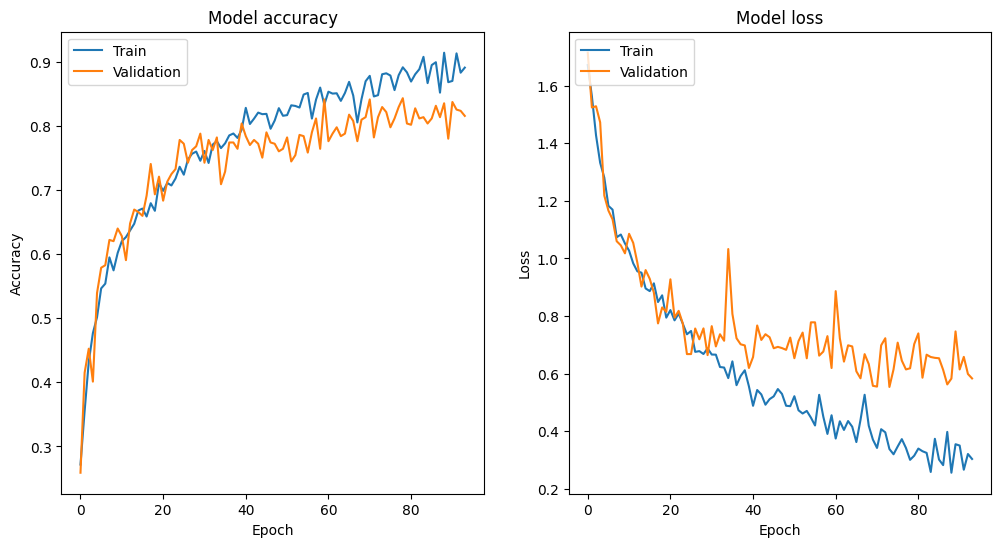

In [18]:
# plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [26]:
# print metrics on test set
# 
test_generator.reset()
# use all data in the test set
test_generator.samples = test_generator.n
test_generator.batch_size = test_generator.n
X_test , y_test = next(test_generator)
print(X_test.shape)
y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred, target_names=labels.values()))

(506, 200, 200, 3)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

   cardboard       0.94      0.82      0.87        71
       glass       0.81      0.79      0.80       107
       metal       0.83      0.79      0.81        87
       paper       0.82      0.90      0.85       118
     plastic       0.81      0.80      0.80        99
       trash       0.57      0.67      0.62        24

    accuracy                           0.82       506
   macro avg       0.79      0.79      0.79       506
weighted avg       0.82      0.82      0.82       506



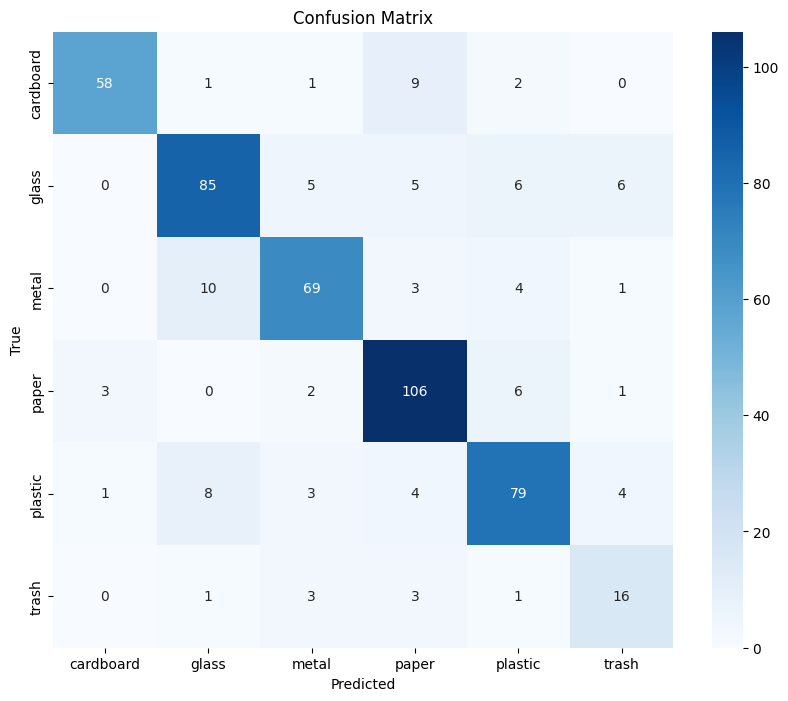

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# save model
model1.save('models/model.h5')